# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here

df = pd.read_csv('../stroke.csv')


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


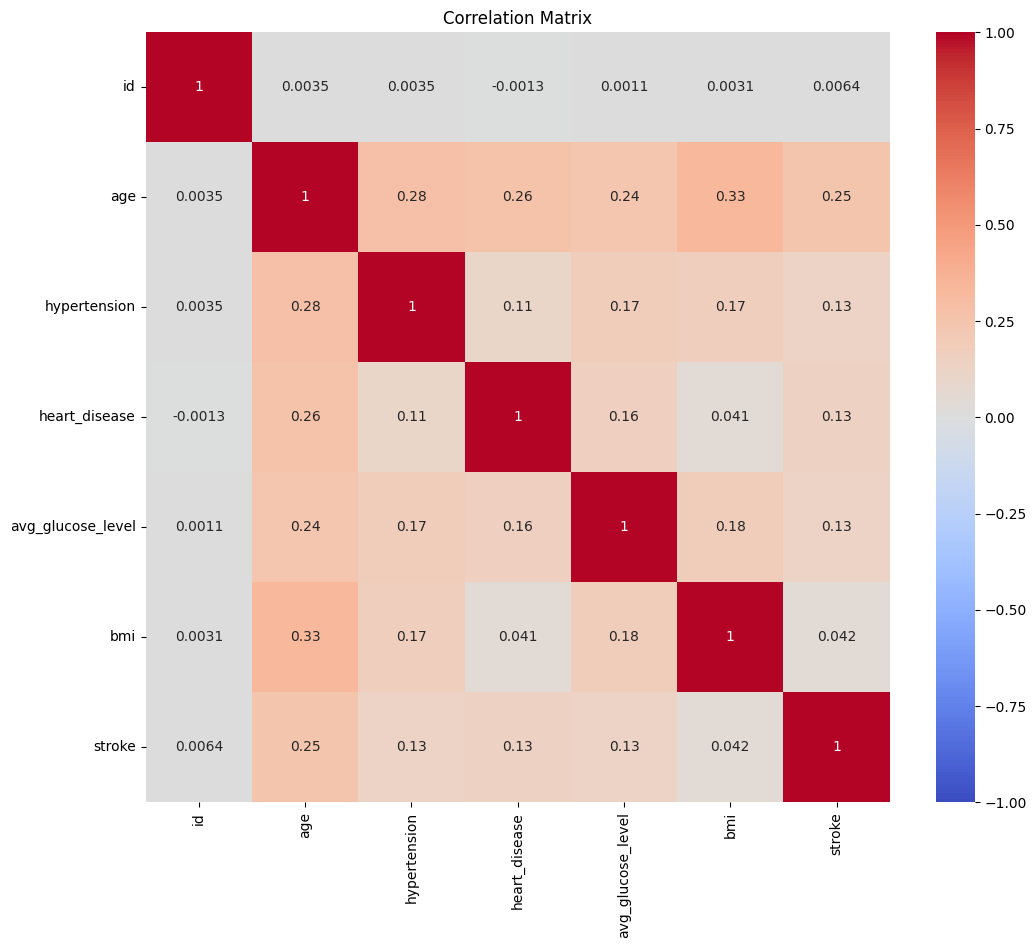

In [6]:
fitur_numerik_real = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[fitur_numerik_real].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


id:
  - Jumlah outlier: 0 (0.00%)
  - Batas bawah: -37669.88
  - Batas atas: 110093.12

age:
  - Jumlah outlier: 0 (0.00%)
  - Batas bawah: -29.00
  - Batas atas: 115.00

hypertension:
  - Jumlah outlier: 498 (9.75%)
  - Batas bawah: 0.00
  - Batas atas: 0.00

heart_disease:
  - Jumlah outlier: 276 (5.40%)
  - Batas bawah: 0.00
  - Batas atas: 0.00

avg_glucose_level:
  - Jumlah outlier: 627 (12.27%)
  - Batas bawah: 21.98
  - Batas atas: 169.36

bmi:
  - Jumlah outlier: 110 (2.15%)
  - Batas bawah: 9.10
  - Batas atas: 47.50

stroke:
  - Jumlah outlier: 249 (4.87%)
  - Batas bawah: 0.00
  - Batas atas: 0.00


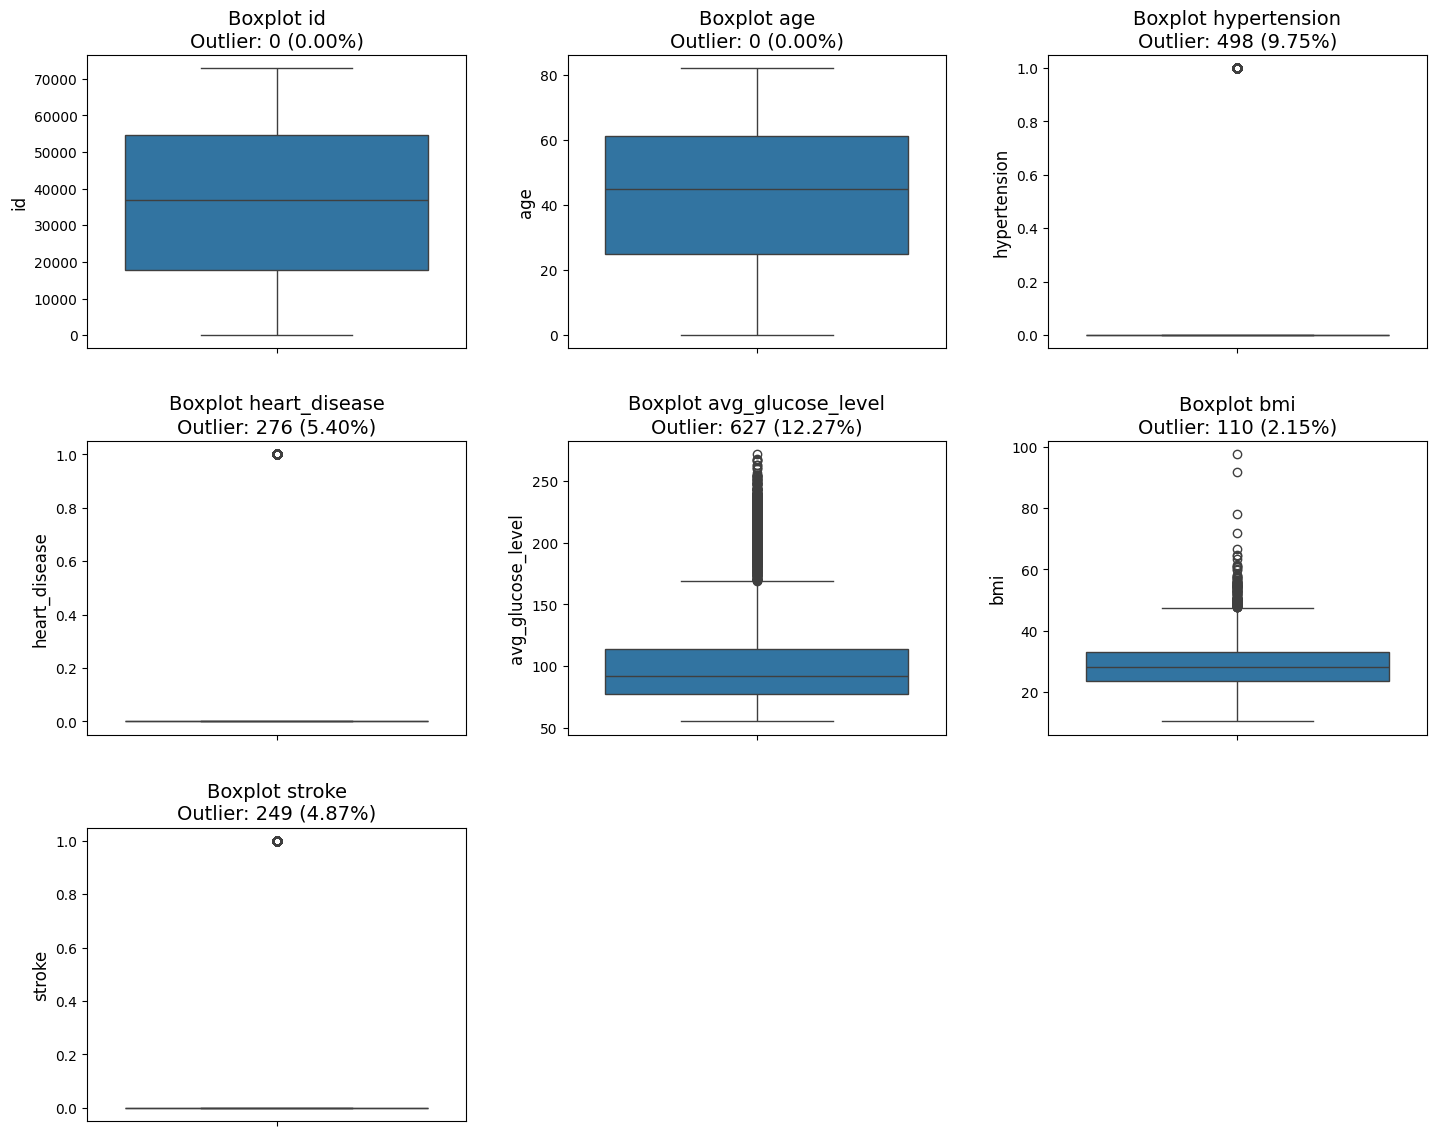

In [7]:
def detect_outliers_iqr(df, column):
    """Fungsi untuk mendeteksi outlier menggunakan metode IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
num_vars = len(fitur_numerik_real)

n_cols = 3
n_rows = -(-num_vars // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(fitur_numerik_real):
    # Visualisasi boxplot
    sns.boxplot(data=df, y=column, ax=axes[i])
    
    # Deteksi outlier menggunakan fungsi detect_outliers_iqr
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Tampilkan informasi outlier pada title
    axes[i].set_title(f'Boxplot {column}\nOutlier: {outlier_count} ({outlier_percentage:.2f}%)', fontsize=14)
    axes[i].set_ylabel(column, fontsize=12)
    
    # Print informasi outlier
    print(f"\n{column}:")
    print(f"  - Jumlah outlier: {outlier_count} ({outlier_percentage:.2f}%)")
    print(f"  - Batas bawah: {lower_bound:.2f}")
    print(f"  - Batas atas: {upper_bound:.2f}")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

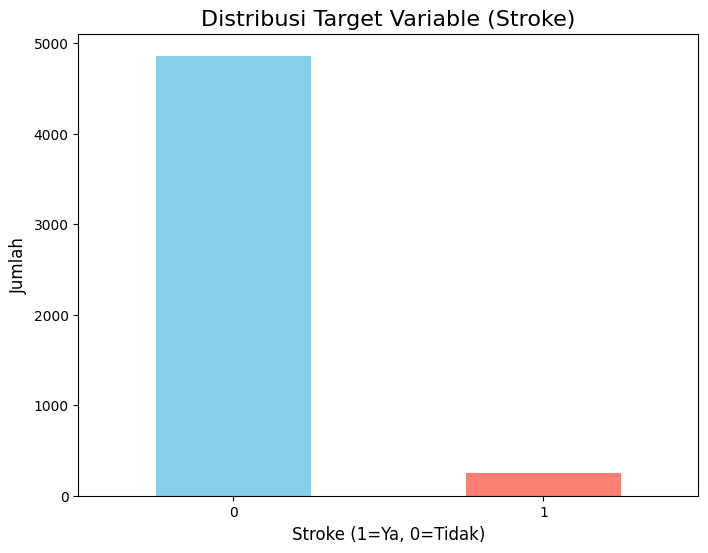


Distribusi Target Variable:
stroke
0    4861
1     249
Name: count, dtype: int64

Persentase:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [8]:
# Analisis distribusi target variable
plt.figure(figsize=(8, 6))
df['stroke'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Target Variable (Stroke)', fontsize=16)
plt.xlabel('Stroke (1=Ya, 0=Tidak)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.show()

print("\nDistribusi Target Variable:")
print(df['stroke'].value_counts())
print(f"\nPersentase:")
print(df['stroke'].value_counts(normalize=True) * 100)



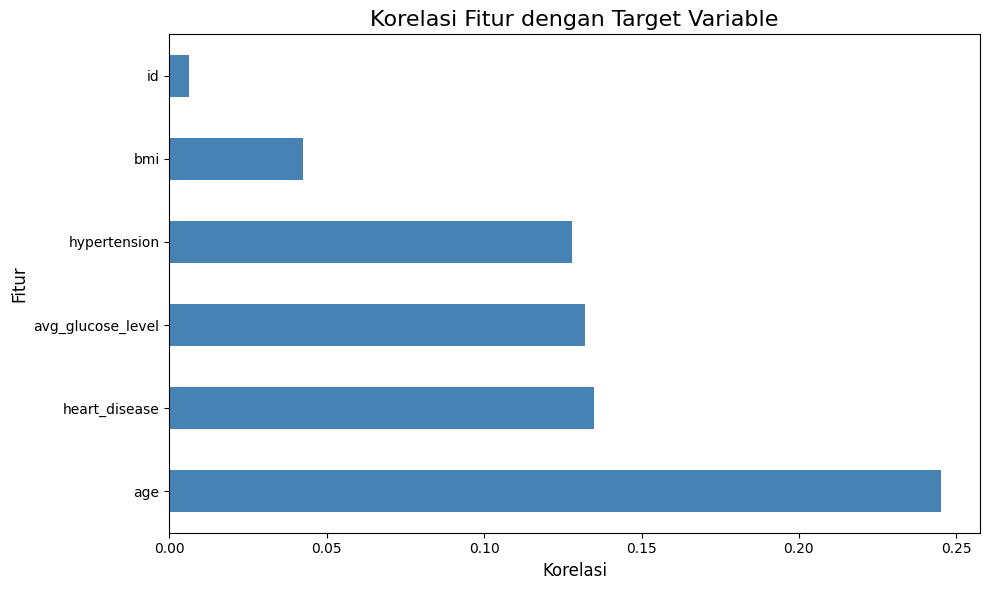

In [9]:
# Analisis korelasi dengan target variable
plt.figure(figsize=(10, 6))
correlation_with_target = df[fitur_numerik_real].corr()['stroke'].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('stroke')  # Hapus korelasi dengan dirinya sendiri
correlation_with_target.plot(kind='barh', color='steelblue')
plt.title('Korelasi Fitur dengan Target Variable', fontsize=16)
plt.xlabel('Korelasi', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# Cek missing values awal
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
# Copy dataframe untuk preprocessing
df_processed = df.copy()


In [13]:
# 1. Menghapus baris dengan smoking_status = 'Unknown'
print("\n1. Menghapus baris dengan smoking_status = 'Unknown'...")
initial_shape = df_processed.shape
if 'smoking_status' in df_processed.columns:
    # Hapus baris dengan "Unknown" (case-insensitive)
    df_processed = df_processed[~df_processed['smoking_status'].str.lower().isin(['unknown'])]
    removed_count = initial_shape[0] - df_processed.shape[0]
    print(f"   Baris yang dihapus: {removed_count}")
    print(f"   Data sebelum: {initial_shape[0]} baris, setelah: {df_processed.shape[0]} baris")
else:
    print("   Kolom 'smoking_status' tidak ditemukan.")


1. Menghapus baris dengan smoking_status = 'Unknown'...
   Baris yang dihapus: 1544
   Data sebelum: 5110 baris, setelah: 3566 baris


In [14]:
# 2. Menghapus baris dengan missing values pada kolom 'bmi'
print("\n2. Menghapus baris dengan missing values pada kolom 'bmi'...")
initial_shape = df_processed.shape
if 'bmi' in df_processed.columns:
    missing_bmi_count = df_processed['bmi'].isnull().sum()
    if missing_bmi_count > 0:
        df_processed = df_processed.dropna(subset=['bmi'])
        removed_count = initial_shape[0] - df_processed.shape[0]
        print(f"   Baris dengan missing bmi: {missing_bmi_count}")
        print(f"   Baris yang dihapus: {removed_count}")
        print(f"   Data sebelum: {initial_shape[0]} baris, setelah: {df_processed.shape[0]} baris")
    else:
        print("   Tidak ada missing values pada kolom 'bmi'.")
else:
    print("   Kolom 'bmi' tidak ditemukan.")


2. Menghapus baris dengan missing values pada kolom 'bmi'...
   Baris dengan missing bmi: 140
   Baris yang dihapus: 140
   Data sebelum: 3566 baris, setelah: 3426 baris


In [15]:
# 3. Encoding Data Kategorikal (dilakukan setelah cleaning)
print("\n3. Encoding Data Kategorikal...")
categorical_features = df_processed.select_dtypes(include=['object']).columns
encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    encoders[col] = le
    print(f"   - Kolom '{col}' selesai di-encode.")

print("   Encoding selesai.")



3. Encoding Data Kategorikal...
   - Kolom 'gender' selesai di-encode.
   - Kolom 'ever_married' selesai di-encode.
   - Kolom 'work_type' selesai di-encode.
   - Kolom 'Residence_type' selesai di-encode.
   - Kolom 'smoking_status' selesai di-encode.
   Encoding selesai.


In [16]:
# 4. Penanganan Outlier menggunakan IQR Method (Capping)
fitur_numerik = df_processed.select_dtypes(include=['number']).columns
print("\n4. Penanganan Outlier (IQR Method dengan Capping)...")
# Exclude target variable dan id dari outlier handling
fitur_numerik_for_outlier = [col for col in fitur_numerik if col not in ['stroke', 'id', 'Dataset']]

for col in fitur_numerik_for_outlier:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    before_count = len(df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)])
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"   - Kolom '{col}': {before_count} outlier di-cap")

print("   Outlier handling selesai.")


4. Penanganan Outlier (IQR Method dengan Capping)...
   - Kolom 'gender': 0 outlier di-cap
   - Kolom 'age': 0 outlier di-cap
   - Kolom 'hypertension': 408 outlier di-cap
   - Kolom 'heart_disease': 206 outlier di-cap
   - Kolom 'ever_married': 827 outlier di-cap
   - Kolom 'work_type': 1225 outlier di-cap
   - Kolom 'Residence_type': 0 outlier di-cap
   - Kolom 'avg_glucose_level': 465 outlier di-cap
   - Kolom 'bmi': 90 outlier di-cap
   - Kolom 'smoking_status': 1574 outlier di-cap
   Outlier handling selesai.


In [17]:
# 5. Menghapus kolom 'id' jika ada
print("\n5. Menghapus kolom 'id'...")
if 'id' in df_processed.columns:
    df_processed = df_processed.drop('id', axis=1)
    print("   Kolom 'id' berhasil dihapus.")
else:
    print("   Kolom 'id' tidak ditemukan.")

df_processed.head()



5. Menghapus kolom 'id'...
   Kolom 'id' berhasil dihapus.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,0,1,2,1,174.6625,36.6,1,1
2,1,80.0,0,0,1,2,0,105.9200,32.5,1,1
3,0,49.0,0,0,1,2,1,171.2300,34.4,1,1
4,0,79.0,0,0,1,2,0,174.1200,24.0,1,1
5,1,81.0,0,0,1,2,1,174.6625,29.0,1,1


In [18]:
# 6. Normalisasi/Standarisasi Fitur menggunakan MinMaxScaler
print("\n6. Normalisasi Fitur menggunakan MinMaxScaler...")
# Pisahkan fitur dan target
X = df_processed.drop('stroke', axis=1)  # Fitur
y = df_processed['stroke']  # Target

# Normalisasi semua fitur numerik setelah encoding
fitur_numerik_after_encoding = X.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[fitur_numerik_after_encoding] = scaler.fit_transform(X[fitur_numerik_after_encoding])

print(f"   Fitur yang dinormalisasi: {len(fitur_numerik_after_encoding)} fitur")
print(f"   Range nilai setelah normalisasi: 0 - 1")

# Gabungkan kembali dengan target
df_processed = X_scaled.copy()
df_processed['stroke'] = y

print("   Normalisasi selesai.")
df_processed.head()



6. Normalisasi Fitur menggunakan MinMaxScaler...
   Fitur yang dinormalisasi: 10 fitur
   Range nilai setelah normalisasi: 0 - 1
   Normalisasi selesai.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.791667,0.0,0.0,0.0,0.0,1.0,1.000000,0.696023,0.0,1
2,0.5,0.972222,0.0,0.0,0.0,0.0,0.0,0.424953,0.579545,0.0,1
3,0.0,0.541667,0.0,0.0,0.0,0.0,1.0,0.971286,0.633523,0.0,1
4,0.0,0.958333,0.0,0.0,0.0,0.0,0.0,0.995462,0.338068,0.0,1
5,0.5,0.986111,0.0,0.0,0.0,0.0,1.0,1.000000,0.480114,0.0,1


In [19]:
# 7. Konversi tipe data
print("\n7. Konversi tipe data...")
for col in df_processed.columns:
    if col != 'stroke':
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
# Pastikan stroke adalah integer
if 'stroke' in df_processed.columns:
    df_processed['stroke'] = df_processed['stroke'].astype(int)
print("   Konversi tipe data selesai.")
df_processed.head()



7. Konversi tipe data...
   Konversi tipe data selesai.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.791667,0.0,0.0,0.0,0.0,1.0,1.000000,0.696023,0.0,1
2,0.5,0.972222,0.0,0.0,0.0,0.0,0.0,0.424953,0.579545,0.0,1
3,0.0,0.541667,0.0,0.0,0.0,0.0,1.0,0.971286,0.633523,0.0,1
4,0.0,0.958333,0.0,0.0,0.0,0.0,0.0,0.995462,0.338068,0.0,1
5,0.5,0.986111,0.0,0.0,0.0,0.0,1.0,1.000000,0.480114,0.0,1


In [20]:
# 8. Validasi Distribusi Target
print("\n8. Validasi Distribusi Target...")
if 'stroke' in df_processed.columns:
    stroke_dist = df_processed['stroke'].value_counts()
    print(f"   Distribusi stroke setelah preprocessing:")
    for val, count in stroke_dist.items():
        print(f"     - Stroke {val}: {count} sampel ({count/len(df_processed)*100:.2f}%)")
    



8. Validasi Distribusi Target...
   Distribusi stroke setelah preprocessing:
     - Stroke 0: 3246 sampel (94.75%)
     - Stroke 1: 180 sampel (5.25%)


In [21]:
# Ringkasan Data Preprocessing
print("\n" + "="*60)
print("Data preprocessing selesai!")
print(f"Shape data setelah preprocessing: {df_processed.shape}")
print("="*60)
print("\nInfo data final:")
print(df_processed.info())
print("\nPreview data final:")
df_processed.head()



Data preprocessing selesai!
Shape data setelah preprocessing: (3426, 11)

Info data final:
<class 'pandas.core.frame.DataFrame'>
Index: 3426 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3426 non-null   float64
 1   age                3426 non-null   float64
 2   hypertension       3426 non-null   float64
 3   heart_disease      3426 non-null   float64
 4   ever_married       3426 non-null   float64
 5   work_type          3426 non-null   float64
 6   Residence_type     3426 non-null   float64
 7   avg_glucose_level  3426 non-null   float64
 8   bmi                3426 non-null   float64
 9   smoking_status     3426 non-null   float64
 10  stroke             3426 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 307.8 KB
None

Preview data final:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.791667,0.0,0.0,0.0,0.0,1.0,1.000000,0.696023,0.0,1
2,0.5,0.972222,0.0,0.0,0.0,0.0,0.0,0.424953,0.579545,0.0,1
3,0.0,0.541667,0.0,0.0,0.0,0.0,1.0,0.971286,0.633523,0.0,1
4,0.0,0.958333,0.0,0.0,0.0,0.0,0.0,0.995462,0.338068,0.0,1
5,0.5,0.986111,0.0,0.0,0.0,0.0,1.0,1.000000,0.480114,0.0,1
